## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 3

- **100 points [7% of your final grade]**
- **Due April 10, 2022 by 11:59pm**

*Goals of this homework:* In this homework, you will investigate data visualization and the foundations of recommendation.



*Submission instructions:* This homework is a bit different from the previous ones. For the visualizatin component, you will post to Campuswire. See below for details. For the recommendation component, rename this notebook as `UIN_hw3.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be `123456789_hw2.ipynb`. Submit this notebook via Canvas. Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. 

*Late policy:* No late days for the data visualization. For the recommendaiton, you may use up to three of your late days. No homeworks will be accepted after April 13 11:59pm.

## Collaboration Declaration:

***You must add all of your collaboration declarations here. Who did you talk to about this assignment? What web resources did you use? Etc.***

For example:
* Part 3a: I talked to Amy about how to split the data randomly. She helped me understand that I needed to use a random number generator.
* Part 3b: I needed help on how to comment my code, so I relied on this StackOverflow thread: https://stackoverflow.com/questions/184618/what-is-the-best-comment-in-source-code-you-have-ever-encountered
* (Replace this bullet list with your own collaboration declarations.)


## (30 points) Part 1: Data Visualization (submit to Campuswire, no late days)

For this first part, you will create a data visualization based on an exploration of a dataset we provide. Your visualization should capture Tufte's principles of graphical excellence: "complex ideas communicated with clarity, precision, and efficiency."

### The Data
You must choose one of the following datasets:

* Police Shootings: The Washington Post's database contains records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015
    * [data](https://github.com/washingtonpost/data-police-shootings)
    * [website](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) (including some example charts)

* Bike Sharing: This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
    * [data](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

* Tennis Time: A dataset of tennis players and how much time they take.
    * [data](https://github.com/fivethirtyeight/data/tree/master/tennis-time)
    * [article](https://fivethirtyeight.com/features/why-some-tennis-matches-take-forever/)

### Your Goal
1. Identify an interesting story or insight from this data
2. Carefully design a data visualization that communicates this story.

You may assume that your audience is the **general public.**

You may clean, manipulate, and transform the data as you like. You are free to use external data from whatever sources you like. (But be sure to cite them!). Feel free to use as little or as much data as you like, so long as the story (and associated data visualization are compelling). 


### What to Submit

Utimately you should produce:


1. A single image (e.g., PNG, PDF, JPG) that effectively communicates the data. You must use a Python visualization toolkit as your key tool, but you are welcome to augment with other tools if you like (e.g., Photoshop, MS Paint, GIMP). For Python viz tools, you may use matplotlib, plotly, seaborn, geoplotlib, bokeh, networkx, or whatever else you can find.
    
2. A brief explanation describing your design. (a few paragraphs, 1/2 page or so).

Your explanation should justify the design choices you have made. 

* Why did you choose the particular visualization type? 
* What motivated your choice of size, color,
and scale? 
* Why are they appropriate for what you are trying to communicate?
* Additionally, your explanation should document:
    * What you are trying to
communicate
    * The benefits of your choice of visualization
    * As well as any downsides
to your viz (e.g., are certain connections downplayed due to your choices?).

### How to Submit
You should post your image + explanation to Campuswire by April 10 (no late days).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [ ]:
# number of shooting in each city and how many were mentally ill
#df['state'].value_counts().plot(kind='barh',figsize=(15, 10))
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()



Saving states 2.csv to states 2.csv


In [ ]:
#Ref : https://www.kaggle.com/datasets/omer2040/usa-states-to-region?resource=download
#Ref (How to create stacked graph) : https://www.statology.org/seaborn-stacked-bar-plot/
states_df =  pd.read_csv('states 2.csv')

#get regions based on states names
west = states_df.loc[states_df['Region'] == 'West', 'State Code'].tolist()
south = states_df.loc[states_df['Region'] == 'South', 'State Code'].tolist()
northeast = states_df.loc[states_df['Region'] == 'Northeast', 'State Code'].tolist()
midwest = states_df.loc[states_df['Region'] == 'Midwest', 'State Code'].tolist()


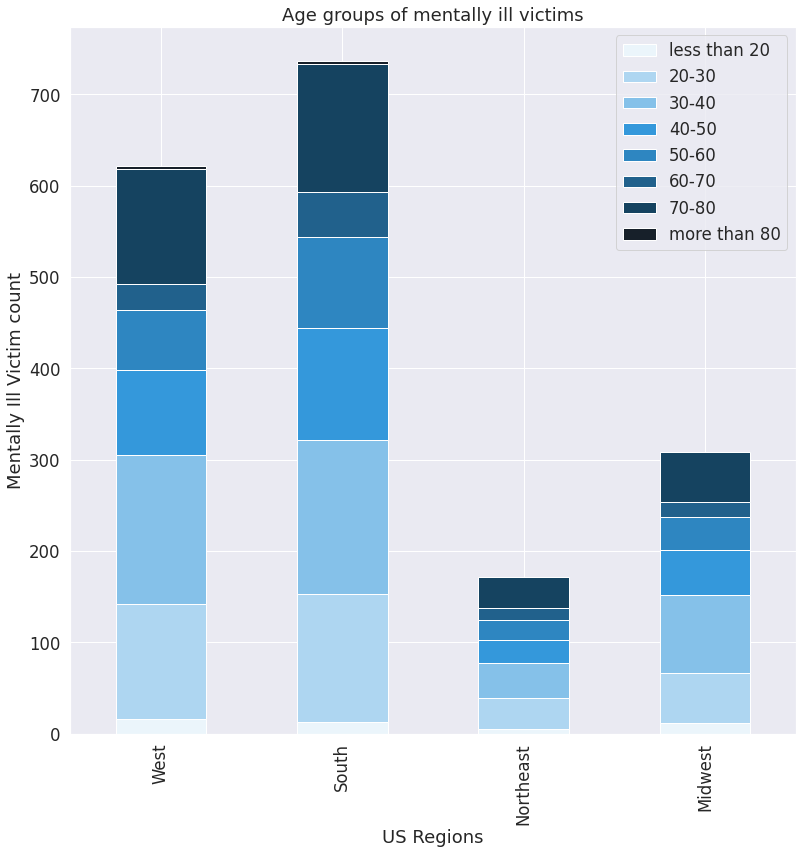

<Figure size 936x936 with 0 Axes>

In [ ]:
import numpy as np

total_mental = df[df['signs_of_mental_illness']==True].count()
total_mental = total_mental['signs_of_mental_illness']
non_mental = df[df['signs_of_mental_illness']==False].count()
non_mental = non_mental['signs_of_mental_illness']

new_df = df[df['signs_of_mental_illness']==True]

#less then 20
A1 = new_df[new_df['age']<20.0]
A1_n = pd.DataFrame(A1['state'].value_counts())
A1_n.reset_index(inplace=True)
A1_n.columns = ['state','less than 20']

#20-30
A2 = new_df[(new_df['age']>=20.0) & (new_df['age']<30.0)]
A2_n = pd.DataFrame(A2['state'].value_counts())
A2_n.reset_index(inplace=True)
A2_n.columns = ['state','20-30']

# #30-40
A3 = new_df[(new_df['age']>=30.0) & (new_df['age']<40.0)]
A3_n = pd.DataFrame(A3['state'].value_counts())
A3_n.reset_index(inplace=True)
A3_n.columns = ['state','30-40']

# #40-50
A4 = new_df[(new_df['age']>=40.0) & (new_df['age']<50.0)]
A4_n = pd.DataFrame(A4['state'].value_counts())
A4_n.reset_index(inplace=True)
A4_n.columns = ['state','40-50']

# #50-60
A5 = new_df[(new_df['age']>=50.0) & (new_df['age']<60.0)]
A5_n = pd.DataFrame(A5['state'].value_counts())
A5_n.reset_index(inplace=True)
A5_n.columns = ['state','50-60']

# #60-70
A6 = new_df[(new_df['age']>=60.0) & (new_df['age']<70.0)]
A6_n = pd.DataFrame(A6['state'].value_counts())
A6_n.reset_index(inplace=True)
A6_n.columns = ['state','60-70']

# #70-80
A7 = new_df[(new_df['age']>=70.0) & (new_df['age']<80.0)]
A7_n = pd.DataFrame(A2['state'].value_counts())
A7_n.reset_index(inplace=True)
A7_n.columns = ['state','70-80']

# #>80
A8 = new_df[(new_df['age']>=80.0)]
A8_n = pd.DataFrame(A8['state'].value_counts())
A8_n.reset_index(inplace=True)
A8_n.columns = ['state','more than 80']

final_dfA = pd.DataFrame(new_df['state'].unique())

final_dfA.columns=['state']
dfs = [A1_n,A2_n,A3_n,A4_n,A5_n,A6_n,A7_n,A8_n]
for i in dfs:
  final_dfA =pd.merge(final_dfA,i,on='state',how='outer').fillna(0)

final_dfA.set_index('state',inplace=True)

def split_regions(region):
  temp = final_dfA.loc[region[0]]
  for i in range(1,len(region)):
    temp += final_dfA.loc[region[i]]
  temp = pd.DataFrame(temp)
  temp.reset_index(inplace=True)
  return temp

#West
west_r = split_regions(west)
west_r.columns = ['Age Categories','West']
#South
south_r = split_regions(south)
south_r.columns = ['Age Categories','South']
#Northeast
northeast_r = split_regions(northeast)
northeast_r.columns = ['Age Categories','Northeast']
#Midwest
midwest_r = split_regions(midwest)
midwest_r.columns = ['Age Categories','Midwest']

area_df = pd.merge(west_r,south_r,how='outer').fillna(0)
area_df = pd.merge(area_df,northeast_r,how='outer').fillna(0)
area_df = pd.merge(area_df,midwest_r,how='outer').fillna(0)
area_df = area_df.T
area_df = area_df[1:]
area_df.columns = ['less than 20','20-30','30-40','40-50','50-60','60-70','70-80','more than 80']
area_df
sns.set(rc={'figure.figsize':(13,13)})
sns.set(font_scale = 1.5)
area_df.plot(kind='bar',stacked=True, color=['#ebf5fb','#aed6f1','#85c1e9','#3498db','#2e86c1','#21618c','#154360','#17202A'])
plt.title('Age groups of mentally ill victims')
plt.xlabel('US Regions')
plt.ylabel('Mentally Ill Victim count')
plt.show()
plt.savefig('foo.png')

### Grading Breakdown

- 10%: Interestingness and clarity of question you ask
- 20%: Appropriateness of data, scale, and other viz design choices
- 10%: Legends, context, and titles of your viz
- 20%: Overall quality of your viz: in the extreme, every pixel serves a purpose
- 20%: Design rationale (writeup)
- 20%: Pros and cons of your design (writeup)


## (5 points) Part 2: Data Viz Critique (on Campuswire by April 17)

After all the data visualizations have been posted to Campuswire, you will be responsible for providing a critique of **at least two** data visualizations provided by your classmates. 

You should reply in the thread and provide a brief *constructive* critique. Do your best to load balance, so that every data visualization receives some feedback.

On the final homework, each student will have an opportunity to revise the original data visualization based on this feedback.



## (65 points) Part 3: Recommendation with User Ratings (Explicit Feedback) 

In this part, we focus on the rating prediction recommendation task with explicit feedback. We will:

* load and process the MovieLens 1M dataset, 
* build a baseline estimation model,
* build a collaborative filtering model,
* build a matrix factorization model,
* and try to improve upon these models.

First, we need to load and preprocess the experiment dataset. We use the MovieLens 1M data from https://grouplens.org/datasets/movielens/1m/ in this homework. The code has been provided in the next cell, and you need to run it. The resulting data variables are: train_mat is the numpy array variable for training data of size (#users, #items) with non-zero entries representing user-item ratings, and zero entries representing unknown user-item ratings; and test_mat is the numpy array variable for testing data of size (#users, #items).

In [11]:
# if you're using colab, this is a clunky way to load the ratings.dat file we need
# navigate in your finder to ratings.dat when asked
from google.colab import files
uploaded = files.upload()

Saving ratings.dat to ratings (1).dat


In [12]:
import io
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

data_df = pd.read_csv(io.BytesIO(uploaded['ratings.dat']), sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])

# if you are running this notebook locally, you can replace above with something like this:
# data_df = pd.read_csv('./ratings.dat', sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])

# First, generate dictionaries for mapping old id to new id for users and movies
unique_MovieID = data_df['MovieID'].unique()
unique_UserID = data_df['UserID'].unique()
j = 0
user_old2new_id_dict = dict()
for u in unique_UserID:
    user_old2new_id_dict[u] = j
    j += 1
j = 0
movie_old2new_id_dict = dict()
for i in unique_MovieID:
    movie_old2new_id_dict[i] = j
    j += 1
    
# Then, use the generated dictionaries to reindex UserID and MovieID in the data_df
user_list = data_df['UserID'].values
movie_list = data_df['MovieID'].values
for j in range(len(data_df)):
    user_list[j] = user_old2new_id_dict[user_list[j]]
    movie_list[j] = movie_old2new_id_dict[movie_list[j]]
data_df['UserID'] = user_list
data_df['movieID'] = movie_list

# generate train_df with 70% samples and test_df with 30% samples, and there should have no overlap between them.
train_index = np.random.random(len(data_df)) <= 0.7
train_df = data_df[train_index]
test_df = data_df[~train_index]

# generate train_mat and test_mat
num_user = len(data_df['UserID'].unique())
num_movie = len(data_df['MovieID'].unique())

train_mat = coo_matrix((train_df['Rating'].values, (train_df['UserID'].values, train_df['MovieID'].values)), shape=(num_user, num_movie)).astype(float).toarray()
test_mat = coo_matrix((test_df['Rating'].values, (test_df['UserID'].values, test_df['MovieID'].values)), shape=(num_user, num_movie)).astype(float).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


## Part 3a: Build the Baseline Estimation Model (15 points)

First, let's implement a simple personalized recommendation model -- the baseline estimate -- introduced in class: $b_{u,i}=\mu+b_i+b_u$, where $\mu$ is the overall mean rating for all items, $b_u$ = average rating of user $u-\mu$, $b_i$ = average rating of item $i-\mu$. Store your prediction as a numpy array variable 'prediction_mat' of size (#users, #movies) with each entry showing the predicted rating for the corresponding user-movie pair.

* Hint: for users who do not have ratings in train_mat, set $b_u=0$ for them; and for movies which do not have ratings in train_mat, set $b_i=0$ for them

In [3]:
# calculate the prediction_mat by the baseline estimation recommendation algorithm

#calculate mu
mu = train_mat.sum()/np.count_nonzero(train_mat)
#calculate bi
np.seterr(divide='ignore', invalid='ignore')
bi = train_mat.sum(0)/(train_mat != 0).sum(0) #columns
#calculate bu
bu = train_mat.sum(1) /(train_mat != 0).sum(1) #rows
prediction_mat = np.zeros((num_user, num_movie))
def baseline(user,item):
  return bu[user]+bi[item]-mu

for u in range(num_user):
  for i in range(num_movie):
    if(train_mat[u][i]==0):
         prediction_mat[u][i] = baseline(u,i)
prediction_mat[np.isnan(prediction_mat)] = 0

#prediction_mat

Now, with this prediction_mat based on the baseline estimate, let's calculate the RMSE to evaluate the quality of the baseline estimate model. Please print out the RMSE of your prediction_mat using test_mat in the next cell.


In [4]:
# calculate and print out the RMSE for your prediction_df and the test_df
from math import sqrt
def RMSE(test_mat,pred_mat):
  sum = 0
  for u in range(num_user):
    for i in range(num_movie):
      if(test_mat[u][i]!=0):
        sum +=((pred_mat[u][i]-test_mat[u][i])*(pred_mat[u][i]-test_mat[u][i]))
        
  return sqrt(sum/np.count_nonzero(test_mat))
      
RMSE(test_mat,prediction_mat)

0.9381410310202551

## Part 3b: Collaborative Filtering with Jaccard Similarity (15 points)

In this part, you need to build a collaborative filtering recommendation model with **Jaccard similarity** to predict user-movie ratings. 

The prediction of the score for a user-item pair $(u,i)$ should use the formulation: $p_{u,i}=\bar{r}_u+\frac{\sum_{u^\prime\in N}s(u,u^\prime)(r_{u^\prime,i}-\bar{r}_{u^\prime})}{\sum_{u^\prime\in N}|s(u, u^\prime)|}$ as introduced in class, where $s(u, u^\prime)$ is the Jaccard similarity. We set the size of $N$ as 10.

In the next cell, you need to write your code to implement this algorithm, and generate a numpy array variable named 'prediction_mat' of size (#user, #movie) with each entry showing the predicted rating for the corresponding user-movie pair.

* Hint: when you find the nearest neighbor set $N$ of a user $u$, do not include user $u$ in $N$  


In [5]:


import numpy as np
import pandas as pd

b_user = dict()
for ind in range(num_user):
    curr = sum(train_mat[ind]>0)
    b_user[ind] = 0
    if curr>0:
        b_user[ind] = (sum(train_mat[ind])/curr)-mu

r_hat = {k:v+mu for k,v in b_user.items()}

In [6]:
# calculate the prediction_mat by your user-user collaborative filtering recommendation algorithm

import numpy as np
import pandas as pd

#Ref (Jaccard function): https://stackoverflow.com/questions/32805916/compute-jaccard-distances-on-sparse-matrix

def pairwise_jaccard(X):
    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = intrsct / unions
    return dist

def get_neighbors(sim,N):
  neighb = {}
  for i in range(num_user):
    indices = list(np.argsort(sim[i])[::-1])
    indices.remove(i)
    neighb[i] = indices[:N]
  return neighb


def predict_mat(train_mat,N):
  predictions_mat = np.zeros(train_mat.shape)
  similarity = pairwise_jaccard(train_mat)
  neighb = get_neighbors(similarity,N)
  for u in range(num_user):
    
    for i in range(num_movie):
      nume = 0
      denom = 0
      for n in neighb[u]:
        if(train_mat[n,i]>0):
          nume += similarity[u,i] * (train_mat[n,i]-r_hat[n])
          denom += similarity[u,i]
        
        if (denom > 0):
          predictions_mat[u,i] = r_hat[u] + nume/denom
        else:
          predictions_mat[u,i] = r_hat[u]
      
  return predictions_mat

predictions_df = predict_mat(train_mat,10)


Please print out the RMSE of your prediction_mat using test_mat in the next cell.

In [7]:
# calculate and print out the RMSE for your prediction_df and the test_df
# Your Code Here...
RMSE(test_mat,predictions_df)

1.045819369144408

Comparing the RMSE results of this collaborative filtering and the baseline estimate algorithm, what do you observe? Is the  collaborative filtering the one producing the best performance? What reasons do you think can explain what you observe?

RMSE of Collaborative filtering is higher compared to baseline estimator. The main reason for this is that we are only using 10 neighbors to compare similarity. Therefore Baseline has best perfomance.

## Part 3c: Matrix Factorization (15 points)

Now we turn to matrix factorization. First, let's implement the matrix factorization (MF for short) model introduced in class. The MF model can be mathematically represented as: 

<center>$\underset{\mathbf{P},\mathbf{Q}}{\text{min}}\,\,L=\sum_{(u,i)\in\mathcal{O}}(\mathbf{P}_u\cdot\mathbf{Q}^\top_i-r_{u,i})^2+\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}})$,</center>
    
where $\mathbf{P}$ is the user latent factor matrix of size (#user, #latent); $\mathbf{Q}$ is the movie latent factor matrix of size (#movie, #latent); $\mathcal{O}$ is a user-movie pair set containing all user-movie pairs having ratings in train_mat; $r_{u,i}$ represents the rating for user u and movie i; $\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}})$ is the regularization term to overcome overfitting problem, $\lambda$ is the regularization weight (a hyper-parameter manually set by developer, i.e., you), and $\lVert\mathbf{P}\rVert^2_{\text{F}}=\sum_{x}\sum_{y}(\mathbf{P}_{x,y})^2$, $\lVert\mathbf{Q}\rVert^2_{\text{F}}=\sum_{x}\sum_{y}(\mathbf{Q}_{x,y})^2$. Such an L function is called the **loss function** for the matrix factorization model. The goal of training an MF model is to find appropriate $\mathbf{P}$ and $\mathbf{Q}$ to minimize the loss L.

To implement such an MF, here we will write a Python class for the model. There are three functions in this MF class: init, train, and predict. 

* The 'init' function (**already provided**) is to initialize the variables the MF class needs, which takes 5 inputs: train_mat, test_mat, latent, lr, and reg. 'train_mat' and 'test_mat' are the corresponfing training and testing matrices we have. 'latent' represents the latent dimension we set for the MF model. 'lr' represents the learning rate, i.e., the update step in each optimization iteration, default is 0.01. 'reg' represents the regularization weight, i.e., the $\lambda$ in the MF formulation.

* The 'train' function (**partially provided and need to complete**) is to train the MF model given the training data train_mat. There is only one input to this function: an int variable 'epoch' to indicate how many epochs for training the model. The main body of this function should be a loop for 'epoch' iterations. In each iteration, following the algorithm to update the MF model:

        1. Randomly shuffle training user-movie pairs  (i.e., user-movie pairs having ratings in train_mat)
        2. Have an inner loop to iterate each user-movie pair:
                a. given a user-movie pair (u,i), update the user latent factor and movie latent factor by gradient decsent:    
<center>$\mathbf{P}_u=\mathbf{P}_u-\gamma [2(\mathbf{P}_u\cdot\mathbf{Q}_i^\top-r_{u,i})\cdot\mathbf{Q}_i+2\lambda\mathbf{P}_u]$</center>    
<center>$\mathbf{Q}_i=\mathbf{Q}_i-\gamma [2(\mathbf{P}_u\cdot\mathbf{Q}_i^\top-r_{u,i})\cdot\mathbf{P}_u+2\lambda\mathbf{Q}_i]$</center>    
<center>where $\mathbf{P}_u$ and $\mathbf{Q}_i$ are row vectors of size (1, #latent), $\gamma$ is learning rate (default is 0.01), $\lambda$ is regularization weight.</center>
        
        3. After iterating over all user-movie pairs, we have finished the training for the current epoch. Now calculate and print out the value of the loss function L after this epoch, and the RMSE on test_mat by the current MF model. Then append them to lists to keep a record of them.
The train function needs to return two lists: 'epoch_loss_list' recording the loss after each training epoch, and 'epoch_test_RMSE_list' recording the RMSE on test_mat after each training epoch.

* The 'predict' function (**already provided**) is to calculate the prediction_mat by the learned $\mathbf{P}$ and $\mathbf{Q}$.

In the next cell, we provide the 'init' and 'predict' functions. You will need to fill in the 'train' function based on the description above. 

**NOTE that you should not delete or modify the provided code.**

In [19]:
import tqdm
from numpy import linalg as LA
class MF:
    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)
        
        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function
        
        self.num_user, self.num_movie = train_mat.shape
        
        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie paris having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.train_indicator_mat = 1.0 * (train_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in train_mat
        self.test_indicator_mat = 1.0 * (test_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in test_mat

        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for users, size (#movie, self.latent), randomly initialized

    def train(self, epoch=20, verbose=True):
        """
        Goal: Write your code to train your matrix factorization model for epoch iterations in this function
        Input: epoch -- the number of training epoch 
        Output: epoch_loss_list -- a list recording the training loss for each epoch
                epoch_test_RMSE_list -- a list recording the testing RMSE after each training epoch
        """
        epoch_loss_list = []
        epoch_test_RMSE_list = []
        shuffle_mat = list(zip(self.sample_user, self.sample_movie))
        for ep in range(epoch):
            np.random.shuffle(shuffle_mat)
            error = 0
            loss = 0
            total_err = 0
            for curr in shuffle_mat:
              u,i = curr
              
              p_u = np.copy(self.P[u])
              q_i = np.copy(self.Q[i])

              r_hat = np.dot(p_u,q_i.T)
              err = r_hat - train_mat[u][i]

              self.P[u] = p_u - self.lr * ((2 * err * q_i) + (2 * self.reg * p_u))
              self.Q[i] = q_i - self.lr * ((2 * err * p_u) + (2 * self.reg * q_i))
            
              total_err += err ** 2


            l2 = (np.square(self.P)).sum() + (np.square(self.Q)).sum()
          
            loss = total_err + (l2 * self.reg)
            prediction_mat = self.predict()
            rmse = RMSE(test_mat,prediction_mat)
            print("Loss {}: {} / RMSE : {}".format(ep+1,loss,rmse))
            epoch_test_RMSE_list.append(rmse)
            epoch_loss_list.append(loss)

        return epoch_loss_list, epoch_test_RMSE_list

    def predict(self):
        prediction_mat = np.matmul(self.P, self.Q.T)
        return prediction_mat


Now, let's train an MF model based on your implementation. The code is provided, you just need to excute the next cell. The expectations are: 

* first, the code can be successfully excuted without error; 
* and second, the training loss and RMSE on **test_mat** of each training epoch should be printed out for all 20 epochs.


* Hint: the expected time used for training is around 10s to 60s per training epoch.

In [ ]:

mf = MF(train_mat, test_mat, latent=5, lr=0.01, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=20)



Loss 1: 793142.0066794402 / RMSE : 0.9525910057271765
Loss 2: 620879.8490500167 / RMSE : 0.9463561412945587
Loss 3: 608351.1450591953 / RMSE : 0.9389852047730247
Loss 4: 591444.3300577917 / RMSE : 0.9300836680659788
Loss 5: 576087.8593749467 / RMSE : 0.9232111123716844
Loss 6: 564263.690039266 / RMSE : 0.920101289756491
Loss 7: 555007.4304414697 / RMSE : 0.9156287731954114
Loss 8: 547597.4701092759 / RMSE : 0.9115012819490498
Loss 9: 541105.0986471033 / RMSE : 0.9099009661213726
Loss 10: 536176.7332405044 / RMSE : 0.9083115843094963
Loss 11: 531920.6140676311 / RMSE : 0.9051094636159649
Loss 12: 528291.336728629 / RMSE : 0.9051725487258384
Loss 13: 525251.9750012509 / RMSE : 0.9036050285927513
Loss 14: 522656.06157841056 / RMSE : 0.9019717689126702
Loss 15: 520771.10659894167 / RMSE : 0.9004728204041724
Loss 16: 518873.2528133389 / RMSE : 0.8999475544086682
Loss 17: 517346.05886000645 / RMSE : 0.8999612879763201
Loss 18: 516371.2208757765 / RMSE : 0.9002702433821064
Loss 19: 515257.242

## Part 3d: Tune Hyper-parameters in Matrix Factorization (10 points)

In the previous part, we train an MF model with latent dimension set as 5, regularization weight as 0.001, training epoch as 20. However, it is not clear whether these are good choices or not. Hence, in this part, we will tune these hyper-parameters to train an effective model.

A most straightforward but powerful method is to grid search each hyper-parameter and find the best one based on the RMSE on test_mat. In this part, we will do the grid search for train epoch, latent dimension, and regularization weight.

#### Tune training epoch####

For training epoch, we only need to run the experiment of MF for one time, and record the test RMSE for each epoch and find the epoch that produces the best test RMSE. To visually show the change of test RMSE corresponding to the training epoch, we can plot the test RMSE for each epoch in a figure as shown in the next cell.

**Note that you need to first install the matplotlib, then you can excute the next cell**

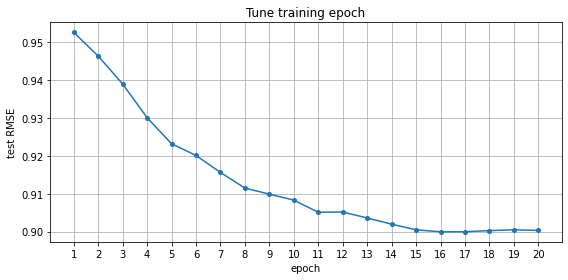

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(np.arange(len(epoch_test_RMSE_list)) + 1, epoch_test_RMSE_list, marker='.', linewidth=1.5, markersize=8)
ax.set_xticks(np.arange(len(epoch_test_RMSE_list)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.show()


Based on this plot, what is the best epoch for your MF model?

The best epoch is 17.

#### Tune latent dimension####

By this figure, you can find the best epoch for your MF model. Similarly, you can plot how the test RMSE changes when you set different latent dimensions. For this, you need to run the code to initialize and train the MF model for multiple times with different settings of 'latent'. Please run the MF model with 'latent' as {1,3,5,7,9}, and plot the corresponding test RMSE for these five different latent dimensions in the next cell. 

**Note that for these five runs of experiments, record the test RMSE after E training epochs -- E is the best epoch you find by the 'Tune training epoch' plot. And here, fix regularization weight as 0.001**.

**Note that the expected output of the next cell is just the plot, you don't need to show the code and printing of the experiment with different 'latent' here.**

In [ ]:
# Your Code Here...
latents = [1,3,5,7,9]
RMSE_list = [];
for i in latents:
  mf = MF(train_mat, test_mat, latent=i, lr=0.01, reg=0.001)
  epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=18)
  RMSE_list.append(min(epoch_test_RMSE_list))


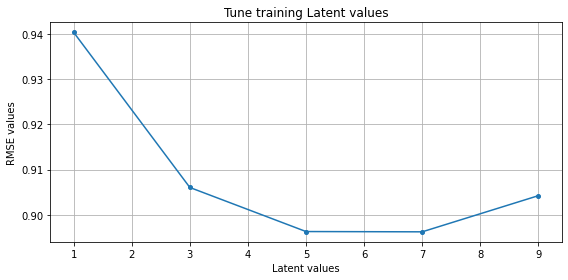

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(latents,RMSE_list, marker='.', linewidth=1.5, markersize=8)
ax.set_ylabel('RMSE values')
ax.set_xlabel('Latent values')
ax.set_title('Tune training Latent values')
ax.grid(True)
plt.tight_layout()
plt.show()

Based on this plot, what is the best latent dimension for your MF model?

Best latent factor : 5

#### Tune regularization weight####

Last, you can plot how the test RMSE changes when you set different regularization weight. Please run the MF model with 'reg' as {0.0001,0.0005,0.001,0.0015,0.002}, and plot corresponding test RMSE for these five different regularization weights in the next cell. 

**Note that for these five runs of experiments, record the test RMSE after E training epochs -- E is the best epoch you find by the 'Tune training epoch' plot. And here, fix latent dimension as the one you find the best by the previous part**

**Note that the expected output of the next cell is just the plot, you don't need to show the code and printing of the experiment with different 'reg' here.**

In [ ]:
from matplotlib.scale import register_scale
regs = [0.0001,0.0005,0.001,0.0015,0.002]
regs_list = [];
for i in regs:
  mf = MF(train_mat, test_mat, latent=5, lr=0.01, reg=i)
  epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=18)
  regs_list.append(min(epoch_test_RMSE_list))



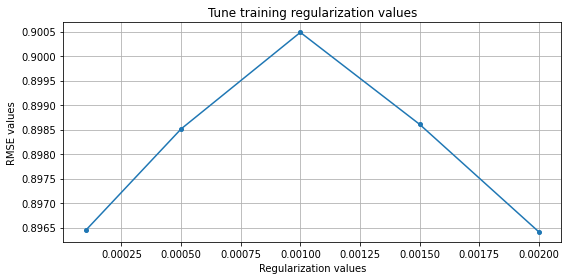

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(regs,regs_list, marker='.', linewidth=1.5, markersize=8)
ax.set_ylabel('RMSE values')
ax.set_xlabel('Regularization values')
ax.set_title('Tune training regularization values')
ax.grid(True)
plt.tight_layout()
plt.show()

Based on this plot, what is the best regularization weight for your MF model?


Based on the plot the best regularization is 0.002

## Part 3e: Improve the Model (10 points)

Next, you need to try your best to improve the model so that we can improve our RMSE! This is open-ended, so feel free to try whatever tricks you like. We talked about several in class, plus you can find more in the readings. Write your code in the next cell and print out the RMSE of your new model.

In [23]:
# implement your improved model and print out the RMSE
# Your Code Here...
mf = MF(train_mat, test_mat, latent=9, lr=0.005, reg=0.05)
epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=20)



Loss 1: 738625.060041292 / RMSE : 0.9409061263352534
Loss 2: 604731.1978594484 / RMSE : 0.9321879856752436
Loss 3: 594977.9170150228 / RMSE : 0.9296069288085935
Loss 4: 590574.5106645747 / RMSE : 0.9285745339121634
Loss 5: 587301.2243533493 / RMSE : 0.9273050713559308
Loss 6: 583750.8436007472 / RMSE : 0.925346759388926
Loss 7: 578602.3780258138 / RMSE : 0.921994646849116
Loss 8: 571371.0251407777 / RMSE : 0.9179958054141122
Loss 9: 562792.0963396747 / RMSE : 0.9122805843963271
Loss 10: 553526.2012635474 / RMSE : 0.9081086928171934
Loss 11: 545366.4338233898 / RMSE : 0.9037243054219418
Loss 12: 538128.949294987 / RMSE : 0.9000895514648677
Loss 13: 531312.821247795 / RMSE : 0.896769941854399
Loss 14: 525228.7247720637 / RMSE : 0.8955154121158774
Loss 15: 519725.9210295599 / RMSE : 0.8927147191986362
Loss 16: 514579.9056937722 / RMSE : 0.8895117793112194
Loss 17: 509841.9891609735 / RMSE : 0.8884829721069287
Loss 18: 505487.6767365675 / RMSE : 0.8865164426331229
Loss 19: 501602.649483526

In [24]:
import math
print(min(epoch_test_RMSE_list))



0.8837890795663401


In my new model i have decreased the value of learning rate and increased the value of regularization and my new model has best RMSE is 0.883. 
I have used lr = 0.005 and reg = 0.05


*Briefly explain what you do in your new model to improve the performance Write your answer here...*